# <span style="color:darkorange"> Niet stationaire tijdsreeksen opgave


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
sns.set_style("darkgrid")

## <span style="color:deeppink"> CO<sup>2</sup> uitstoot </span>

De dataset CO<sup>2 </sup> bevat historische gegevens van de wereldwijde CO<sup>2 </sup>  uitstoot, die mede verantwoordelijk zou zijn voor de opwarming van de aarde. De uitstoot wordt gegeven in Gigaton (miljard ton = duizend miljard kilogram).

Laad het bestand `CO2.csv` in als de dataset, gebruik de kolom jaar als de index kolom

In [97]:
df = pd.read_csv('CO2.csv', index_col='Jaar')
df.head()

,Uitstoot CO2 (Gigaton)
Jaar,
1975,15.54
1976,16.37
1977,16.93
1978,17.44
1979,17.96


Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'Jaar')

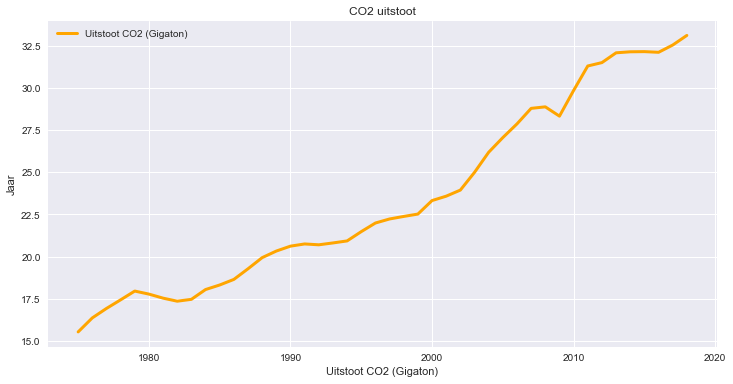

In [98]:
df.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('CO2 uitstoot')
plt.xlabel("Uitstoot CO2 (Gigaton)")
plt.ylabel("Jaar")

Ga na of er een lineaire trend aanwezig is en of deze dat al dan niet stationair is.

Intercept = -809.6158985200843
Richtingscoëfficiënt =  0.4172762508809019


<AxesSubplot:xlabel='Jaar'>

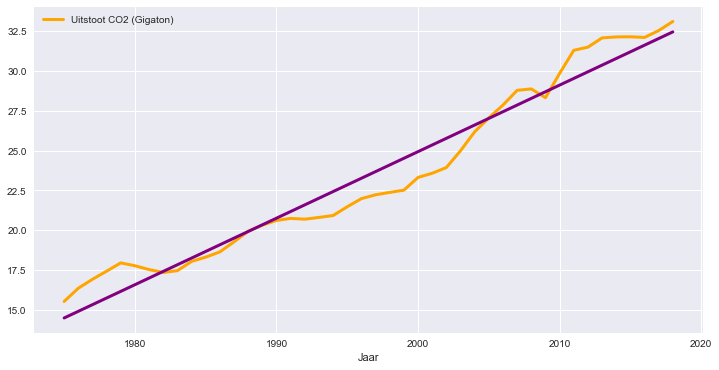

In [99]:
from sklearn import datasets, linear_model
x = df.index.values
y = df['Uitstoot CO2 (Gigaton)'].values


regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

df.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

Verwijder de trend uit de data zodat je de residuen bekomt.

In [100]:
df['trendlijn'] = df.index*regressionline.coef_[0] + regressionline.intercept_ 
df.head()

df['residuen'] =df['Uitstoot CO2 (Gigaton)'] - df['trendlijn']
df.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen
Jaar,,,
1975,15.54,14.504697,1.035303
1976,16.37,14.921973,1.448027
1977,16.93,15.339249,1.590751
1978,17.44,15.756526,1.683474
1979,17.96,16.173802,1.786198


Maak een plot van de residuen en controleer of de residuen stationair zijn via het toevoegen van een trendlijn

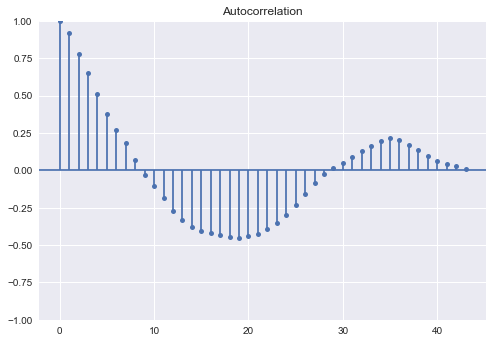

In [101]:
fig = plot_acf(df['residuen'], lags = len(df)-1, alpha=None)

Gebruik moving average en exponentiële demping om het residu van 2019 te voorspellen. Voorspel ook eenvoudigweg op basis van de trendlijn. Zoek de optimale alpha wanneer je gebruik maakt van exponentiele demping. Kies de beste voorspellingsmethode op basis van de MAE (Mean Average Error).

The lowest MAE is:  0.34353090122425756 index: 
alpha:  1.0


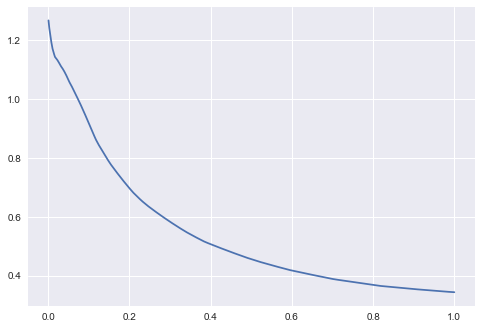

In [102]:
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step = step)
df2 = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    exponential = []
    exponential = df['residuen'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(df['residuen'] - exponential).mean())

df2['mae'] = mae
df2.set_index(alphas[1:], inplace=True)
df2.index.name = 'Alpha'

minimum_mae = df2['mae'].min()
print("The lowest MAE is: ", minimum_mae, "index: ")
print("alpha: ", df2[df2['mae'] == minimum_mae].index[0])

plt.plot(df2['mae'])

In [103]:
df['exponentiele demping'] = df['residuen'].ewm(alpha=1, adjust=False).mean().shift(1)
df.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping
Jaar,,,,
1975,15.54,14.504697,1.035303,NaN
1976,16.37,14.921973,1.448027,1.035303
1977,16.93,15.339249,1.590751,1.448027
1978,17.44,15.756526,1.683474,1.590751
1979,17.96,16.173802,1.786198,1.683474


Voeg de trend opnieuw toe aan de beste voorspelling

In [104]:
df['Uitstoot CO2 (Gigaton)	'] = df['trendlijn'] + df['exponentiele demping']
df.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,Uitstoot CO2 (Gigaton)\t
Jaar,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,15.957276
1977,16.93,15.339249,1.590751,1.448027,16.787276
1978,17.44,15.756526,1.683474,1.590751,17.347276
1979,17.96,16.173802,1.786198,1.683474,17.857276


Maak een grafiek van de tijdreeks samen met de voorspellingslijn.

Text(0, 0.5, 'Uitstoot CO2 (Gigaton)')

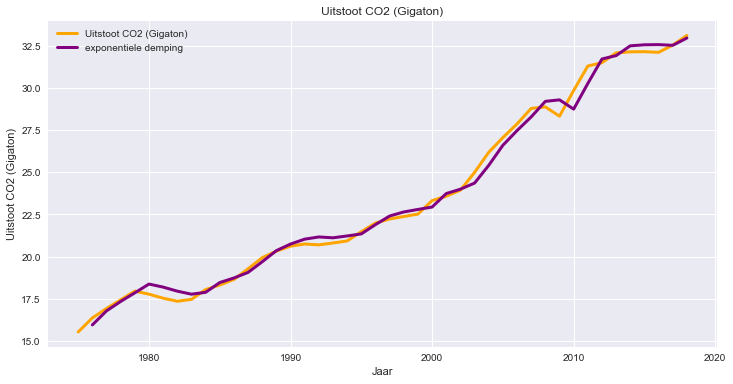

In [105]:
df['mae exp'] = abs(df['Uitstoot CO2 (Gigaton)']- df['Uitstoot CO2 (Gigaton)\t']) 
df['Uitstoot CO2 (Gigaton)'].plot(color='orange', linewidth=3, figsize=(12,6))
df['Uitstoot CO2 (Gigaton)\t'].plot(color='purple', linewidth=3)
plt.legend(labels = ['Uitstoot CO2 (Gigaton)', 'exponentiele demping'])
plt.title("Uitstoot CO2 (Gigaton)")
plt.xlabel(df.index.name)
plt.ylabel(df.columns[0])

Vanaf hier gaan we de MA doen

In [106]:
df['MA_3'] = df['Uitstoot CO2 (Gigaton)'].rolling(3).mean().shift(1)
df['MA_5'] = df['Uitstoot CO2 (Gigaton)'].rolling(5).mean().shift(1)

df['ABS_MA_3'] = abs(df['Uitstoot CO2 (Gigaton)']-df['MA_3'])
df['ABS_MA_5'] = abs(df['Uitstoot CO2 (Gigaton)']-df['MA_5'])



In [107]:
df

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,Uitstoot CO2 (Gigaton)\t,mae exp,MA_3,MA_5,ABS_MA_3,ABS_MA_5
Jaar,,,,,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,15.957276,0.412724,NaN,NaN,NaN,NaN
1977,16.93,15.339249,1.590751,1.448027,16.787276,0.142724,NaN,NaN,NaN,NaN
1978,17.44,15.756526,1.683474,1.590751,17.347276,0.092724,16.280000,NaN,1.160000,NaN
1979,17.96,16.173802,1.786198,1.683474,17.857276,0.102724,16.913333,NaN,1.046667,NaN
1980,17.78,16.591078,1.188922,1.786198,18.377276,0.597276,17.443333,16.848,0.336667,0.932
1981,17.54,17.008354,0.531646,1.188922,18.197276,0.657276,17.726667,17.296,0.186667,0.244
1982,17.36,17.425631,-0.065631,0.531646,17.957276,0.597276,17.760000,17.530,0.400000,0.170
1983,17.47,17.842907,-0.372907,-0.065631,17.777276,0.307276,17.560000,17.616,0.090000,0.146


In [108]:
print(f'De gemmidelde abs fout van MA3 is {df["ABS_MA_3"].mean()}')
print(f'De gemmidelde abs fout van MA5 is {df["ABS_MA_5"].mean()}')
print(f'De gemmidelde abs fout van exp is {df["mae exp"].mean()}')

De gemmidelde abs fout van MA3 is 0.8343902439024395
De gemmidelde abs fout van MA5 is 1.1941538461538463
De gemmidelde abs fout van exp is 0.34353090122425756


## <span style="color:deeppink"> alcohol sales </span>
De winst op verkoop van alcohol stijgt jaar na jaar. In het tabblad alcohol sales kan je de verkoop per maand zien sinds 1992 in miljoen dollar. (bron: https://fred.stlouisfed.org/series/S4248SM144NCEN#0) 

Lees het bestand `alcohol sales.csv` in, gebruik de eerste kolom als index



In [109]:
df = pd.read_csv('alcohol sales.csv', index_col='id')
df.head()

,date,Month,sales (million dollar)
id,,,
0,1/01/1992,January,3459
1,1/02/1992,February,3458
2,1/03/1992,March,4002
3,1/04/1992,April,4564
4,1/05/1992,May,4221


Maak een grafiek van deze tijdreeks 

Text(0, 0.5, 'sales (million dollar)')

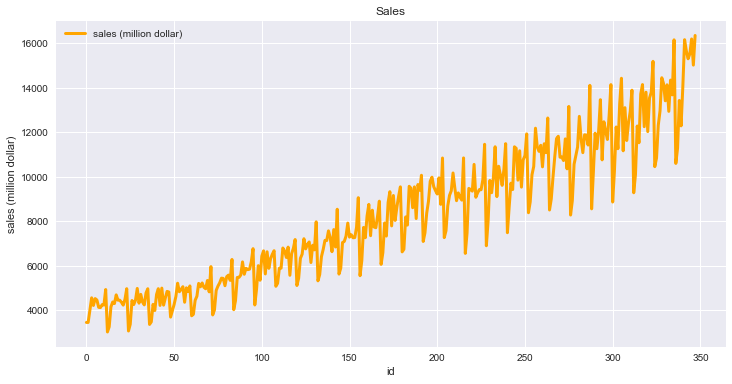

In [110]:
df.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Sales')
plt.xlabel("id")
plt.ylabel("sales (million dollar)")

Bepaal de trend in de tijdreeks en geef de vergelijking ervan.

Gebruik seizoensregressie om een voorspelling van de sales van elke maand in 2021 te doen.
1.	Verwijder eerst de trend.
2.	Bepaal het gemiddelde van de residuen van elke maand.
3.	Voorspel het aantal verkopen van elke maand aan de hand van seizoensregressie.
4.	Wat is de MAE?


Intercept = 3089.042502387776
Richtingscoëfficiënt =  29.733465983786378
LinearRegression()


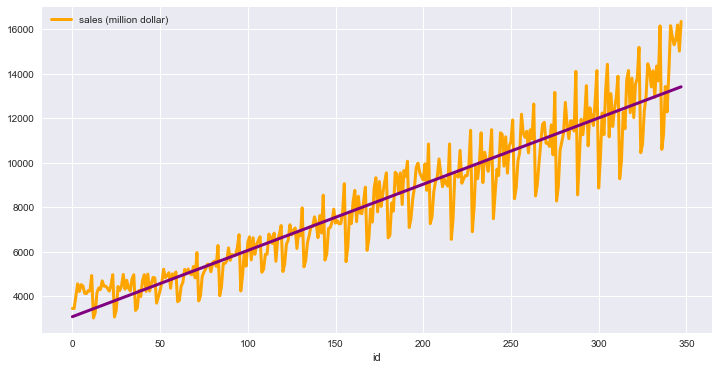

In [111]:
from sklearn import datasets, linear_model
x = df.index.values
y = df['sales (million dollar)'].values


regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

df.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
print(regressionline)

In [112]:
df['trendlijn'] = df.index*regressionline.coef_[0] + regressionline.intercept_ 
df.head()

df['residuen'] =df['sales (million dollar)'] - df['trendlijn']
print(df['residuen'].mean())
df.head()

1.3590150716147205e-13


,date,Month,sales (million dollar),trendlijn,residuen
id,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498
1,1/02/1992,February,3458,3118.775968,339.224032
2,1/03/1992,March,4002,3148.509434,853.490566
3,1/04/1992,April,4564,3178.242900,1385.757100
4,1/05/1992,May,4221,3207.976366,1013.023634


In [113]:
df2 = df.groupby(['Month']).mean()
df2

,sales (million dollar),trendlijn,residuen
Month,,,
April,7890.000000,8173.465186,-283.465186
August,8729.379310,8292.399050,436.980261
December,9788.827586,8411.332913,1377.494673
February,6730.241379,8113.998254,-1383.756874
January,6209.827586,8084.264788,-1874.437201
July,8285.965517,8262.665584,23.299934
June,9135.655172,8232.932118,902.723055
March,7944.724138,8143.731720,-199.007582
May,8727.103448,8203.198652,523.904797


In [121]:
seizoensregressie = []
for i in range(len(df)):
    seizoensregressie.append(df.loc[i,'trendlijn'] + df2.loc[df.loc[i,'Month'],'residuen'])

df['seizoensregressie'] = seizoensregressie
df.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,mae
id,,,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498,1214.605301,2244.394699
1,1/02/1992,February,3458,3118.775968,339.224032,1735.019094,1722.980906
2,1/03/1992,March,4002,3148.509434,853.490566,2949.501853,1052.498147
3,1/04/1992,April,4564,3178.242900,1385.757100,2894.777715,1669.222285
4,1/05/1992,May,4221,3207.976366,1013.023634,3731.881163,489.118837


In [115]:
df['mae'] = abs(df['seizoensregressie'] - df['sales (million dollar)'])
df


,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,mae
id,,,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498,1214.605301,2244.394699
1,1/02/1992,February,3458,3118.775968,339.224032,1735.019094,1722.980906
2,1/03/1992,March,4002,3148.509434,853.490566,2949.501853,1052.498147
3,1/04/1992,April,4564,3178.242900,1385.757100,2894.777715,1669.222285
4,1/05/1992,May,4221,3207.976366,1013.023634,3731.881163,489.118837
...,...,...,...,...,...,...,...
343,1/08/2020,August,15293,13287.621335,2005.378665,13724.601596,1568.398404
344,1/09/2020,September,15516,13317.354801,2198.645199,13198.601596,2317.398404
345,1/10/2020,October,16182,13347.088267,2834.911733,13675.498147,2506.501853


In [ ]:
print(df['mae'].mean())

463.21475669589273


In [135]:
l=[348,349,350,351,352,353,354,355,356,357,358,359]
l2=[]
ret=[]
for i,j in zip(l,df2.index):
    ret.append(((i*regressionline.coef_[0])+regressionline.intercept_)+(df2.loc[j]['residuen']))

print(ret)

[13152.82347913019, 13903.002391523656, 14873.250269434368, 12141.732188359467, 11680.78532722359, 13608.255928339142, 14517.412515479127, 13445.415344931514, 14198.061189292555, 13970.497307649484, 14062.0332051343, 13644.603585377736]


In [136]:
for i,j in zip(df2.index,ret):
    print(f'De voorspelde waarde voor {i} 2021 is {j}')

De voorspelde waarde voor April 2021 is 13152.82347913019
De voorspelde waarde voor August 2021 is 13903.002391523656
De voorspelde waarde voor December 2021 is 14873.250269434368
De voorspelde waarde voor February 2021 is 12141.732188359467
De voorspelde waarde voor January 2021 is 11680.78532722359
De voorspelde waarde voor July 2021 is 13608.255928339142
De voorspelde waarde voor June 2021 is 14517.412515479127
De voorspelde waarde voor March 2021 is 13445.415344931514
De voorspelde waarde voor May 2021 is 14198.061189292555
De voorspelde waarde voor November 2021 is 13970.497307649484
De voorspelde waarde voor October 2021 is 14062.0332051343
De voorspelde waarde voor September 2021 is 13644.603585377736


## <span style="color:deeppink"> toerisme </span>
Deze dataset bevat het  het aantal overnachtingen (in hotel, gastenkamers, campings,…) in Vlaanderen tijdens een bepaalde maand van een bepaald jaar. Gedetailleerde info per provincie kan je trouwens vinden op https://www.toerismevlaanderen.be  
Laad de dataset `toerisme.csv` in, gebruik de eerste kolom Datum als index

In [67]:
df = pd.read_csv('toerisme.csv', index_col='Aantal maanden na januari 2014')
df

,Jaar,Maand,Datum,Aantal overnachtingen
Aantal maanden na januari 2014,,,,
0,2014,januari,januari 2014,1162818
1,2014,februari,februari 2014,1450616
2,2014,maart,maart 2014,1876276
3,2014,april,april 2014,2358104
4,2014,mei,mei 2014,2360854
5,2014,juni,juni 2014,2221182
6,2014,juli,juli 2014,3366208
7,2014,augustus,augustus 2014,3299996
8,2014,september,september 2014,2219712


Plot de grafiek van het aantal overnachtingen, bepaal de trend in de tijdsreeks & geef de vergelijking ervan.

Text(0, 0.5, 'Aantal overnachtingen')

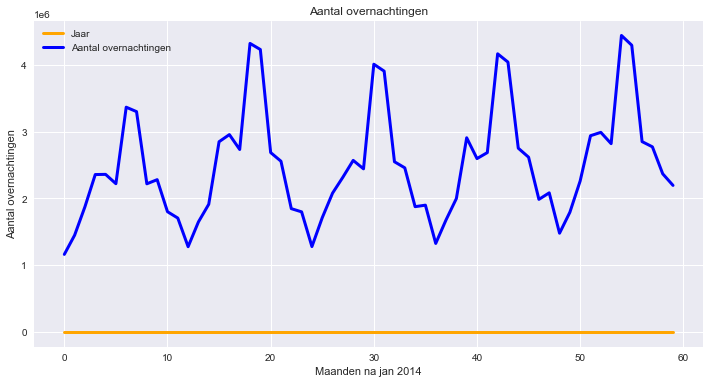

In [68]:
df.plot(color=['orange','blue','red'], linewidth=3, figsize=(12,6))
plt.title('Aantal overnachtingen')
plt.xlabel("Maanden na jan 2014")
plt.ylabel("Aantal overnachtingen")

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes 
- Exponentiële demping. Zorg dat je de optimale alfa kan vinden.
- Seizoensregressie

Welke techniek werkt het best bij deze dataset?  
Plot de echte waarde en de waarden van de voorspellingstechniek op dezelfde grafiek

Intercept = 2146433.168852459
Richtingscoëfficiënt =  12035.240038899694


<AxesSubplot:xlabel='Aantal maanden na januari 2014'>

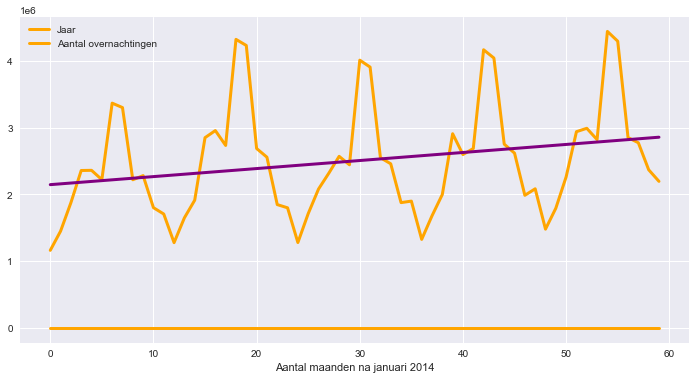

In [69]:
from sklearn import datasets, linear_model
x = df.index.values
y = df['Aantal overnachtingen '].values


regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

df.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [70]:
df['trendlijn'] = df.index*regressionline.coef_[0] + regressionline.intercept_ 
df.head()

df['residuen'] =df['Aantal overnachtingen '] - df['trendlijn']
df.head()

,Jaar,Maand,Datum,Aantal overnachtingen,trendlijn,residuen
Aantal maanden na januari 2014,,,,,,
0,2014,januari,januari 2014,1162818,2.146433e+06,-983615.168852
1,2014,februari,februari 2014,1450616,2.158468e+06,-707852.408891
2,2014,maart,maart 2014,1876276,2.170504e+06,-294227.648930
3,2014,april,april 2014,2358104,2.182539e+06,175565.111031
4,2014,mei,mei 2014,2360854,2.194574e+06,166279.870992


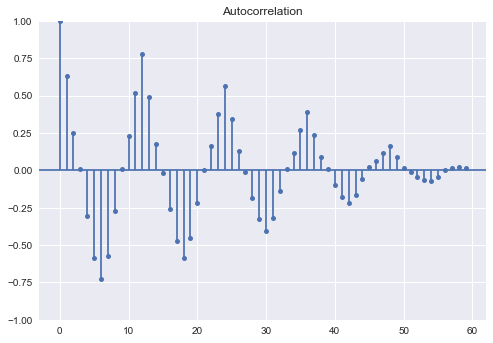

In [71]:
fig = plot_acf(df['residuen'], lags = len(df)-1, alpha=None)

The lowest MAE is:  489098.8377728152 index: 
alpha:  0.982


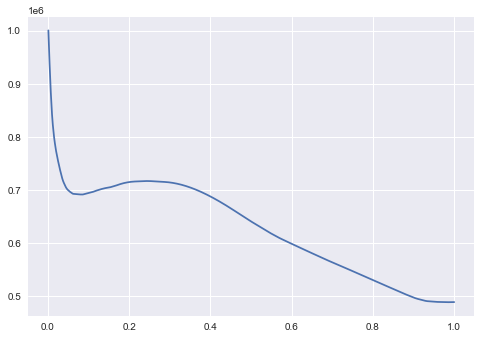

In [72]:
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step = step)
df2 = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    exponential = []
    exponential = df['residuen'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(df['residuen'] - exponential).mean())

df2['mae'] = mae
df2.set_index(alphas[1:], inplace=True)
df2.index.name = 'Alpha'

minimum_mae = df2['mae'].min()
print("The lowest MAE is: ", minimum_mae, "index: ")
print("alpha: ", df2[df2['mae'] == minimum_mae].index[0])

plt.plot(df2['mae'])

In [74]:
df['exponentiele demping'] = df['residuen'].ewm(alpha=0.982, adjust=False).mean().shift(1)
df.head()

,Jaar,Maand,Datum,Aantal overnachtingen,trendlijn,residuen,exponentiele demping
Aantal maanden na januari 2014,,,,,,,
0,2014,januari,januari 2014,1162818,2.146433e+06,-983615.168852,NaN
1,2014,februari,februari 2014,1450616,2.158468e+06,-707852.408891,-983615.168852
2,2014,maart,maart 2014,1876276,2.170504e+06,-294227.648930,-712816.138571
3,2014,april,april 2014,2358104,2.182539e+06,175565.111031,-301762.241744
4,2014,mei,mei 2014,2360854,2.194574e+06,166279.870992,166973.218681


In [75]:
df['exp_voorspelling'] = df['trendlijn'] + df['exponentiele demping']
df.head()

,Jaar,Maand,Datum,Aantal overnachtingen,trendlijn,residuen,exponentiele demping,exp_voorspelling
Aantal maanden na januari 2014,,,,,,,,
0,2014,januari,januari 2014,1162818,2.146433e+06,-983615.168852,NaN,NaN
1,2014,februari,februari 2014,1450616,2.158468e+06,-707852.408891,-983615.168852,1.174853e+06
2,2014,maart,maart 2014,1876276,2.170504e+06,-294227.648930,-712816.138571,1.457688e+06
3,2014,april,april 2014,2358104,2.182539e+06,175565.111031,-301762.241744,1.880777e+06
4,2014,mei,mei 2014,2360854,2.194574e+06,166279.870992,166973.218681,2.361547e+06


Text(0, 0.5, 'Jaar')

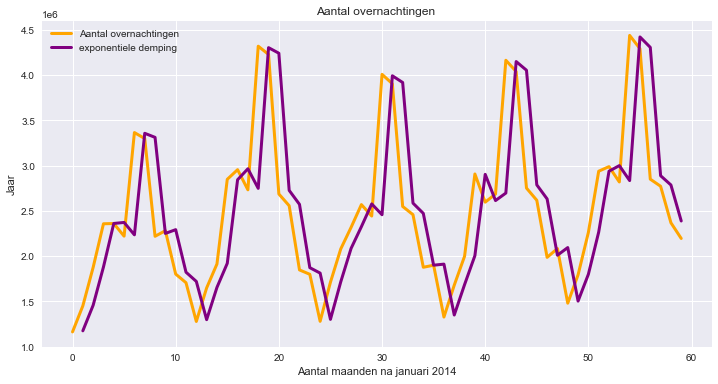

In [76]:
df['mae exp'] = abs(df['Aantal overnachtingen ']- df['exp_voorspelling']) 
df['Aantal overnachtingen '].plot(color='orange', linewidth=3, figsize=(12,6))
df['exp_voorspelling'].plot(color='purple', linewidth=3)
plt.legend(labels = ['Aantal overnachtingen ', 'exponentiele demping'])
plt.title("Aantal overnachtingen ")
plt.xlabel(df.index.name)
plt.ylabel(df.columns[0])

In [77]:
df['MA_3'] = df['Aantal overnachtingen '].rolling(3).mean().shift(1)
df['MA_5'] = df['Aantal overnachtingen '].rolling(5).mean().shift(1)

df['ABS_MA_3'] = abs(df['Aantal overnachtingen ']-df['MA_3'])
df['ABS_MA_5'] = abs(df['Aantal overnachtingen ']-df['MA_5'])

In [78]:
df

,Jaar,Maand,Datum,Aantal overnachtingen,trendlijn,residuen,exponentiele demping,exp_voorspelling,mae exp,MA_3,MA_5,ABS_MA_3,ABS_MA_5
Aantal maanden na januari 2014,,,,,,,,,,,,,
0,2014,januari,januari 2014,1162818,2.146433e+06,-9.836152e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,februari,februari 2014,1450616,2.158468e+06,-7.078524e+05,-9.836152e+05,1.174853e+06,2.757628e+05,NaN,NaN,NaN,NaN
2,2014,maart,maart 2014,1876276,2.170504e+06,-2.942276e+05,-7.128161e+05,1.457688e+06,4.185885e+05,NaN,NaN,NaN,NaN
3,2014,april,april 2014,2358104,2.182539e+06,1.755651e+05,-3.017622e+05,1.880777e+06,4.773274e+05,1.496570e+06,NaN,8.615340e+05,NaN
4,2014,mei,mei 2014,2360854,2.194574e+06,1.662799e+05,1.669732e+05,2.361547e+06,6.933477e+02,1.894999e+06,NaN,4.658553e+05,NaN
5,2014,juni,juni 2014,2221182,2.206609e+06,1.457263e+04,1.662924e+05,2.372902e+06,1.517197e+05,2.198411e+06,1841733.6,2.277067e+04,379448.4
6,2014,juli,juli 2014,3366208,2.218645e+06,1.147563e+06,1.730359e+04,2.235948e+06,1.130260e+06,2.313380e+06,2053406.4,1.052828e+06,1312801.6
7,2014,augustus,augustus 2014,3299996,2.230680e+06,1.069316e+06,1.127219e+06,3.357899e+06,5.790256e+04,2.649415e+06,2436524.8,6.505813e+05,863471.2
8,2014,september,september 2014,2219712,2.242715e+06,-2.300309e+04,1.070358e+06,3.313073e+06,1.093361e+06,2.962462e+06,2721268.8,7.427500e+05,501556.8


In [79]:
print(f'De gemmidelde abs fout van MA3 is {df["ABS_MA_3"].mean()}')
print(f'De gemmidelde abs fout van MA5 is {df["ABS_MA_5"].mean()}')
print(f'De gemmidelde abs fout van exp is {df["mae exp"].mean()}')

De gemmidelde abs fout van MA3 is 731757.5614035088
De gemmidelde abs fout van MA5 is 881365.2727272727
De gemmidelde abs fout van exp is 489098.8377728152
